## Classification of Mice Based on Protein Expression Levels

## Problem Statement
The goal of this project is to analyze protein expression levels in the cerebral cortex of mice to classify them into different categories based on their genotype, behavior, and treatment. Specifically, the project aims to identify subsets of proteins that can discriminate between these classes and to understand the biological mechanisms underlying learning and memory, particularly in the context of Down syndrome.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load dataset from CSV file
df = pd.read_csv("C:\\Users\\naban\\Downloads\\Data_Cortex_Nuclear.csv")

# Display the first few rows and check columns
print(df.head())
print(df.columns)

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine   

In [48]:
# Fill missing values with the mean of each column, excluding non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [49]:
# Display basic information about the dataset
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

In [14]:
# Check for missing values
print(df.isnull().sum())

# Percentage of missing values in each column
print(df.isnull().mean() * 100)

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64
MouseID      0.0
DYRK1A_N     0.0
ITSN1_N      0.0
BDNF_N       0.0
NR1_N        0.0
            ... 
CaNA_N       0.0
Genotype     0.0
Treatment    0.0
Behavior     0.0
class        0.0
Length: 82, dtype: float64


In [41]:
# Drop non-numeric columns that are not needed for analysis
df_numeric = df.drop(['MouseID'], axis=1)

# Check again
print(df_numeric.dtypes)


DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 81, dtype: object


In [28]:
from sklearn.preprocessing import StandardScaler

# Separate numeric columns for scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Apply standard scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [23]:
# Import necessary libraries
import pandas as pd

# Load your dataset (assuming it's already loaded as `df`)
# Replace this with your actual dataset loading code
# df = pd.read_csv('your_dataset.csv')

# Summary statistics
summary_stats = df.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1).describe()
print(summary_stats)

          DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249015     0.251290     0.049314     0.346810     0.931802   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288163     0.473669     0.287650     2.059152     3.160287   
50%       0.366540     0.566365     0.316703     2.297269     3.763306   
75%       0.487574     0.697500     0.348039     2.528035     4.425107   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1080.000000  1080.000000  1080.000000  1080.000000  1080.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041577     0.027004     1.293368     0.032542     0.466254  ...   
min       0.06323

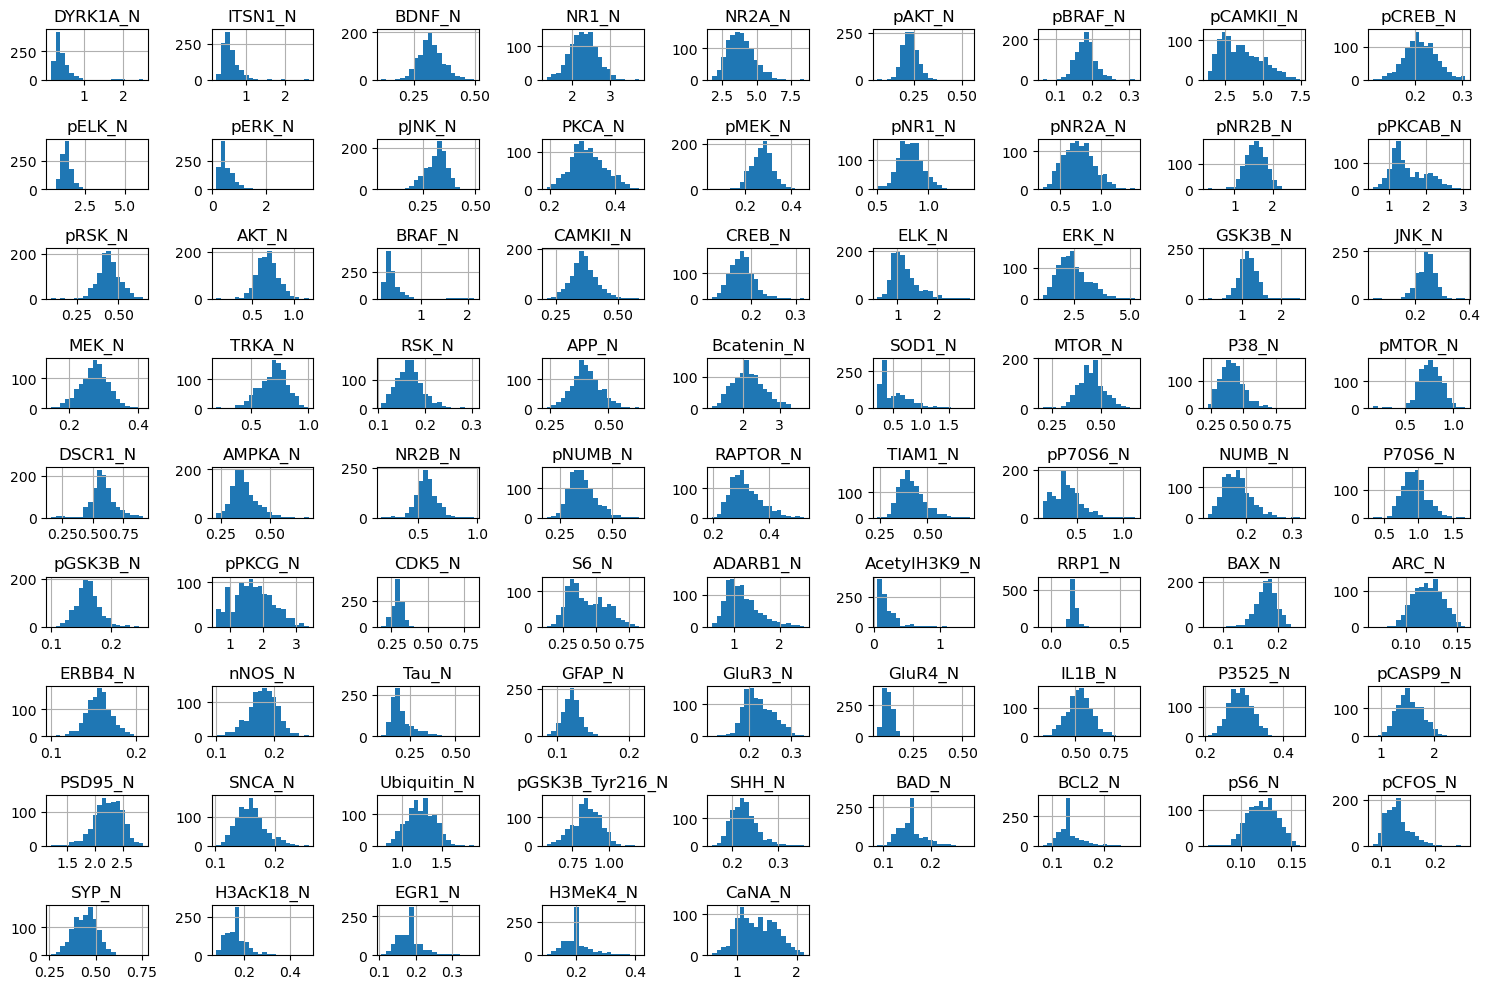

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms of numeric columns
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

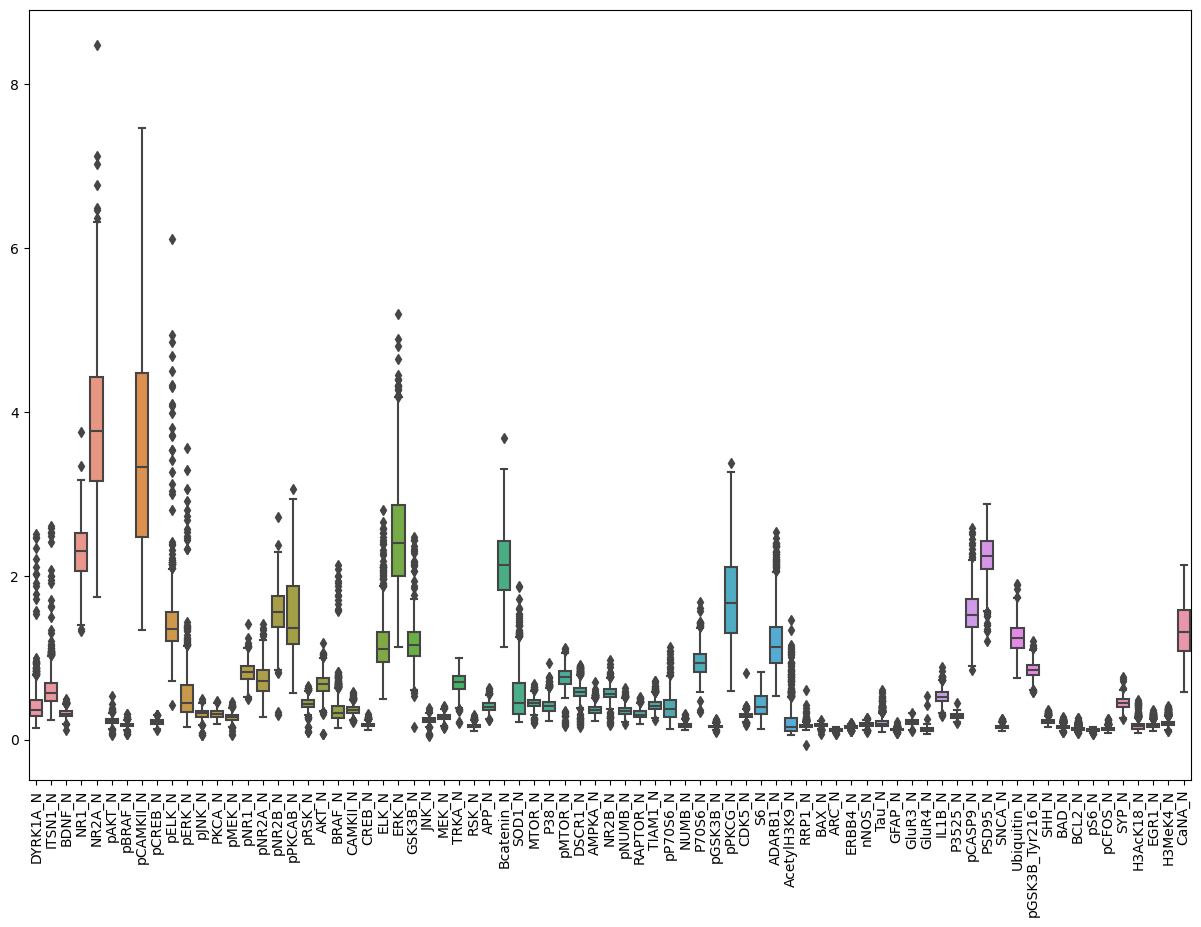

In [16]:
# Box plots for numeric columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1))
plt.xticks(rotation=90)
plt.show()

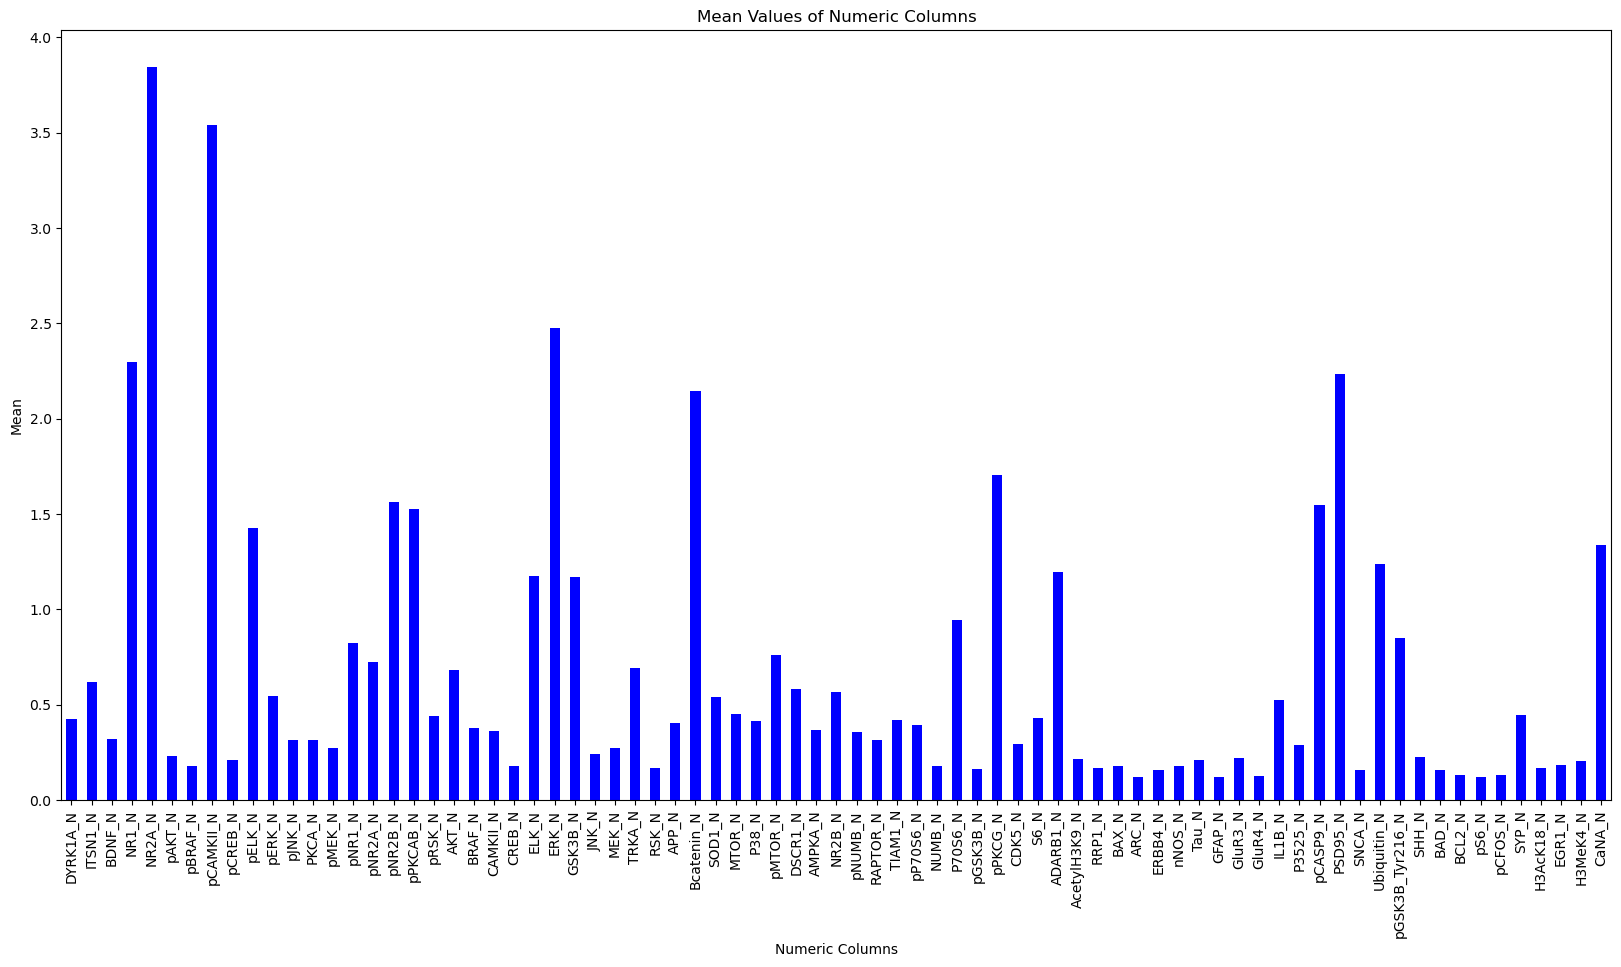

In [18]:
# Calculate mean values of numeric columns
mean_values = df.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1).mean()

# Plot bar plot of mean values
plt.figure(figsize=(20, 10))
mean_values.plot(kind='bar', color='blue')
plt.xticks(rotation=90)
plt.title('Mean Values of Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Mean')
plt.show()

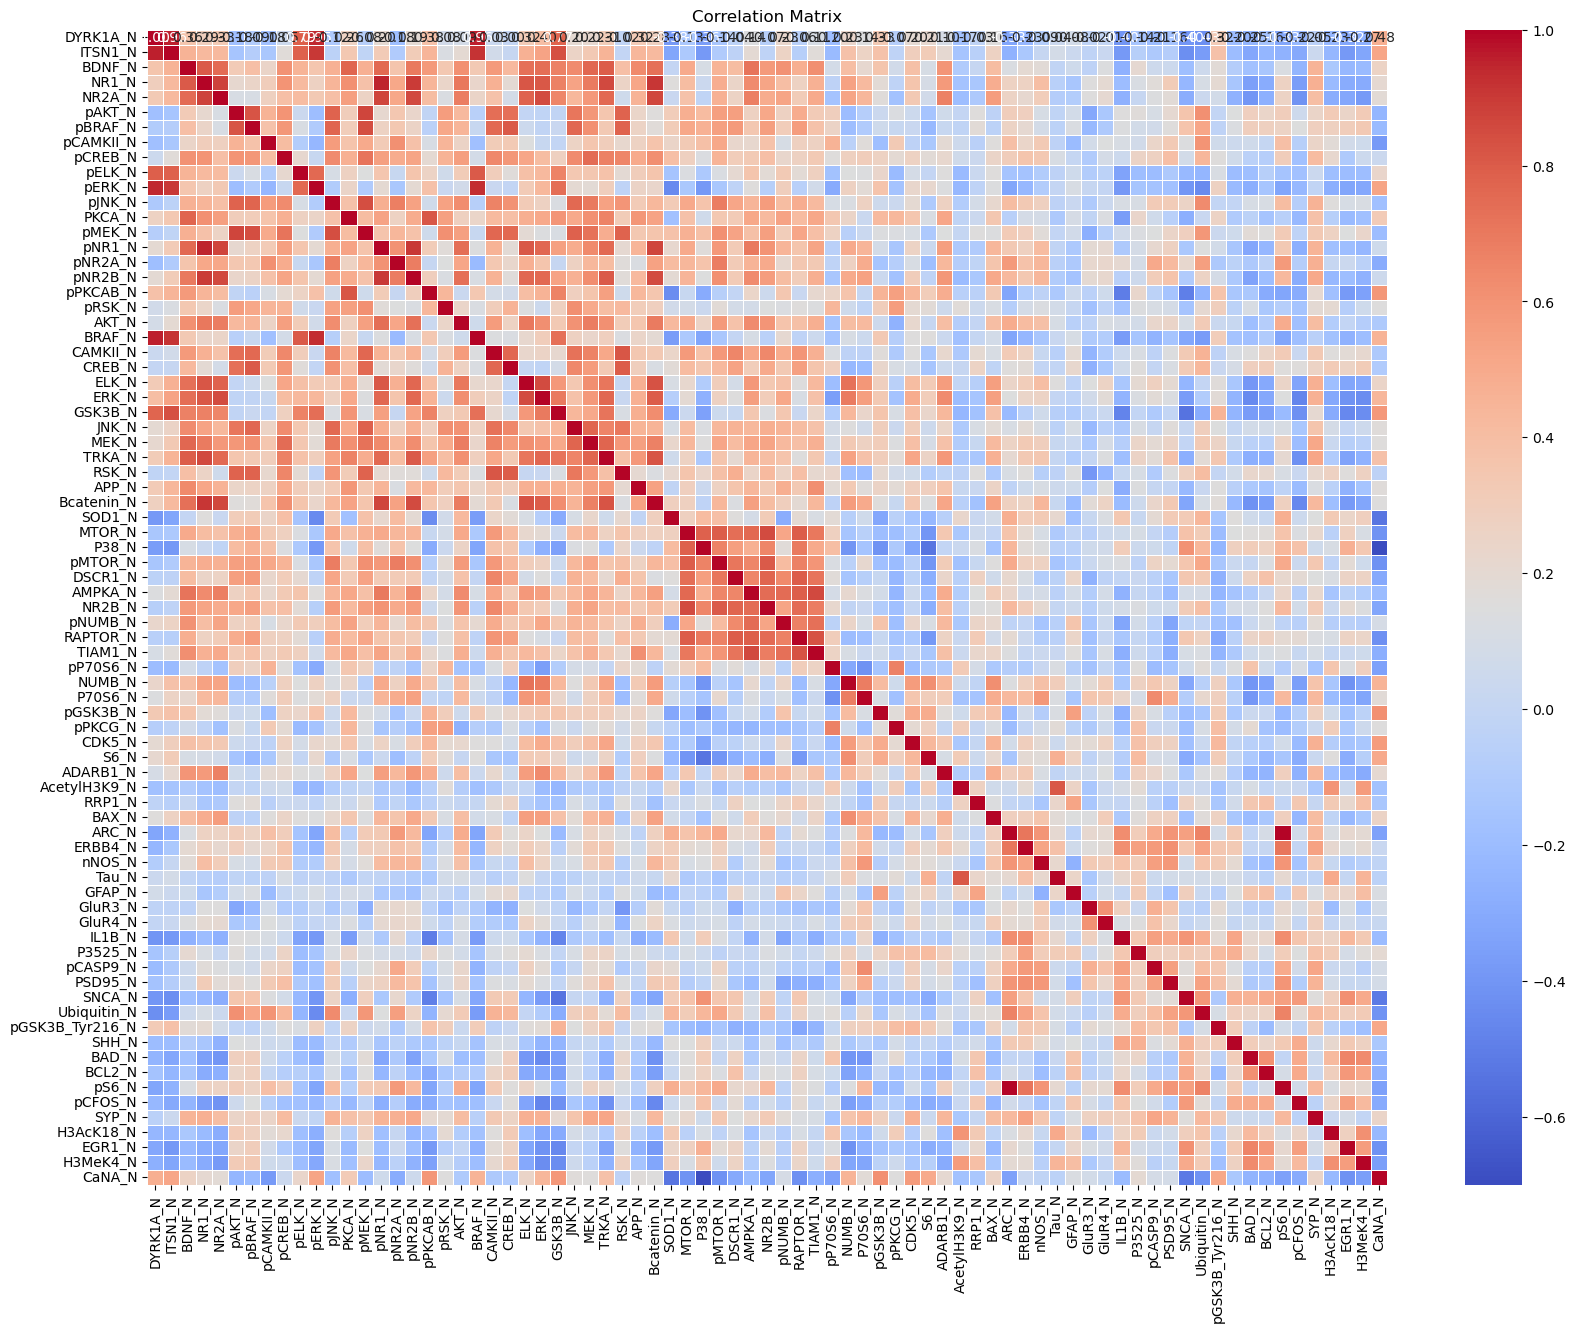

In [20]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include='number')

# Calculate correlation matrix
corr_matrix = numeric_columns.corr()

# Plot heatmap of correlations
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

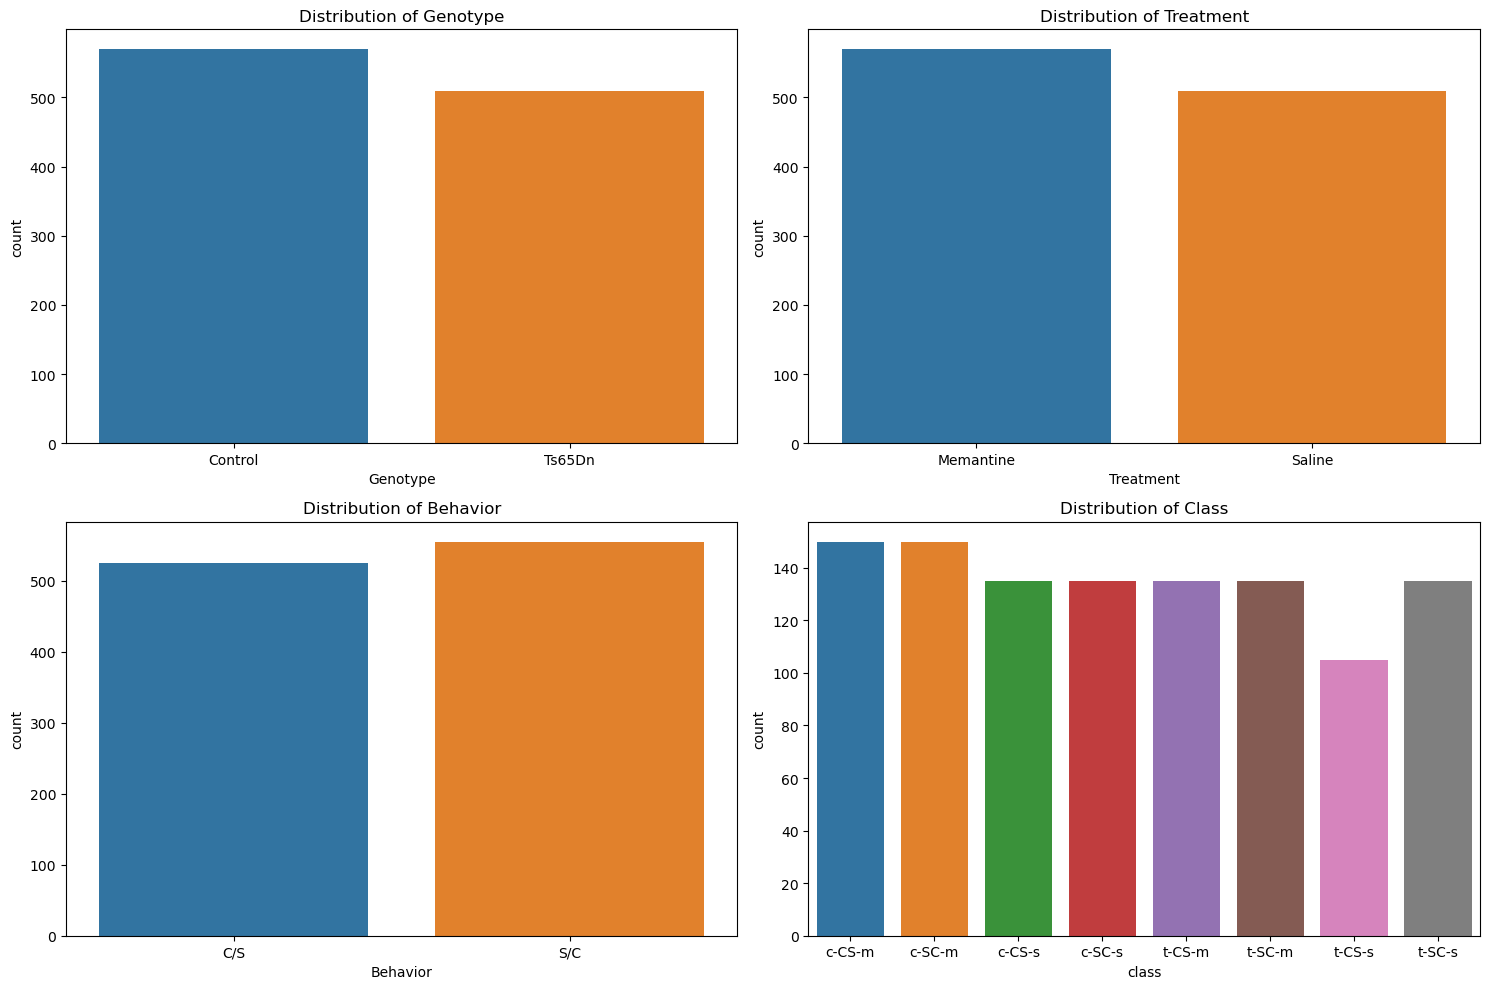

In [22]:
# Count plots for categorical variables
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Genotype', data=df)
plt.title('Distribution of Genotype')

plt.subplot(2, 2, 2)
sns.countplot(x='Treatment', data=df)
plt.title('Distribution of Treatment')

plt.subplot(2, 2, 3)
sns.countplot(x='Behavior', data=df)
plt.title('Distribution of Behavior')

plt.subplot(2, 2, 4)
sns.countplot(x='class', data=df)
plt.title('Distribution of Class')

plt.tight_layout()
plt.show()

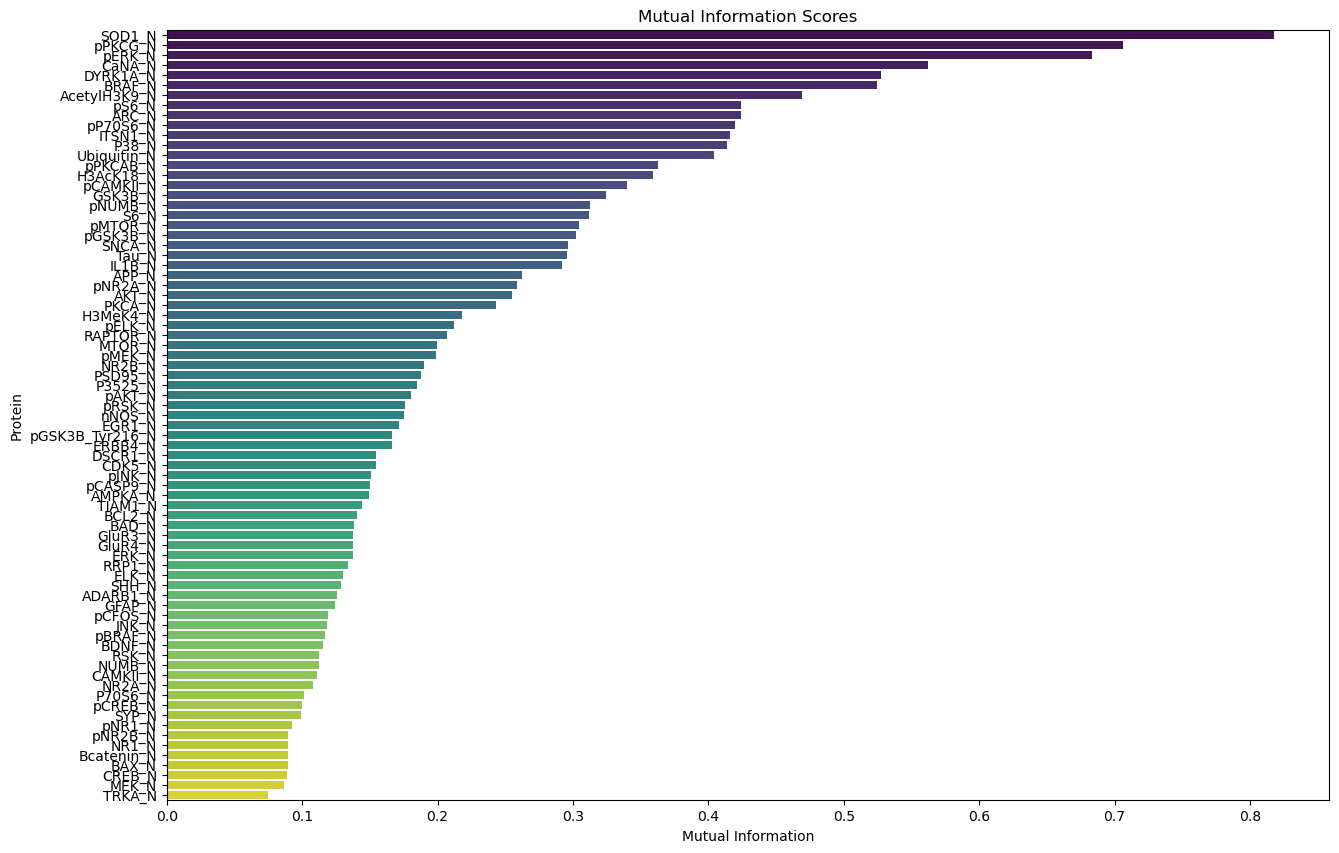

In [32]:
from sklearn.feature_selection import mutual_info_classif

# Extract features and target
X = df.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class'], axis=1)
y = df['class']

# Calculate mutual information
mi_scores = mutual_info_classif(X, y)

# Create a DataFrame to visualize mutual information scores
mi_df = pd.DataFrame({'Protein': X.columns, 'Mutual_Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

# Plot mutual information scores
plt.figure(figsize=(15, 10))
sns.barplot(x='Mutual_Information', y='Protein', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.ylabel('Protein')
plt.show()

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (756, 77)
Shape of X_test: (324, 77)
Shape of y_train: (756,)
Shape of y_test: (324,)


In [34]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Example: Handling missing values and scaling numeric features
# Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# If you have categorical variables, encode them (e.g., one-hot encoding)
# Example: One-hot encoding for categorical columns in X_train and X_test
# encoder = OneHotEncoder(handle_unknown='ignore')
# X_train_encoded = encoder.fit_transform(X_train_categorical)
# X_test_encoded = encoder.transform(X_test_categorical)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Example: Training a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.98
              precision    recall  f1-score   support

      c-CS-m       0.98      1.00      0.99        47
      c-CS-s       1.00      0.98      0.99        49
      c-SC-m       1.00      1.00      1.00        42
      c-SC-s       1.00      1.00      1.00        44
      t-CS-m       0.86      1.00      0.93        31
      t-CS-s       1.00      0.85      0.92        33
      t-SC-m       1.00      1.00      1.00        38
      t-SC-s       1.00      1.00      1.00        40

    accuracy                           0.98       324
   macro avg       0.98      0.98      0.98       324
weighted avg       0.98      0.98      0.98       324

Confusion Matrix:
[[47  0  0  0  0  0  0  0]
 [ 1 48  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  5 28  0  0]
 [ 0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  0  0 40]]


In [37]:
# Example: Feature importance analysis (if using RandomForestClassifier)
feature_importances = model.feature_importances_
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)
print("Feature Importance:")
for feature, importance in sorted_importance[:10]:  # Print top 10 features
    print(f"{feature}: {importance:.4f}")

Feature Importance:
SOD1_N: 0.0649
pPKCG_N: 0.0365
APP_N: 0.0342
pERK_N: 0.0329
CaNA_N: 0.0313
Ubiquitin_N: 0.0285
pCAMKII_N: 0.0266
ARC_N: 0.0261
DYRK1A_N: 0.0255
ITSN1_N: 0.0250
